<a href="https://colab.research.google.com/github/ahcamachod/1819-clustering-extrayendo-patrones-de-datos/blob/main/clustering_aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ciencia de Datos - Clustering: Extrayendo patrones de datos
El objetivo de este proyecto es analizar patrones en el comportamiento de clientes  utilizando la técnica de  aprendizaje no supervisada llamada <b>Clustering</b> para identificar comportamiento y características de los grupos más representativos, y en base a las conclusiones poder diseñar estrategias para aumentar ingresos o disminuir pérdidas.Esto permitirá evaluar la efectividad de la estrategia en determinado grupo de clientes (cluster) , al tener como referencia clientes con patrones de comportamiento semejantes.

En este estudio no se pretende implementar ningun modelo de machine learnig pero si hacer uso de algunas técnicas del preprocesamiento de datos.

En este notebook empleamos un dataset de Kaggle llamado CC GENERAL.csv.

Dataset: https://www.kaggle.com/arjunbhasin2013/ccdata

### **Del proyecto:** 231103-1_data_science_clustering_extrayendo_patrones_datos

### **Procedimientos:**
1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab
2. Importar bibliotecas de los métodos a utilizar
3. Cargar el dataset en un DataFrame
4. Consultar información sobre las variables del Dataframe
5. Preprocesamiento:
    - Eliminar variables innecesarias o que no permitan leer el dataframe
    - Tratamiento de variables con valores faltantes
    - Tratamiento de datos extremos y datos atípicos
    - Normalizar los valores de todas las variables
6. Clusters: Criterios y métricas de validación
    - Coeficiente de Silhouette
    - Indice Davies-Bouldin
    - Indice Calinski-Harabasz
7. Validando y visualizando los clusters.
   - Validando la estructura de los closters
   - Validando la estabilidad de los closters
8. Entendiendo los valores de los atributos en los clusters
9. Interpretando los clusters.
10. Utilizando los clusters

### **1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install -r "/content/drive/MyDrive/Colab Notebooks/231103-1_machine_learning_clustering_extrayendo_patrones_datos/requirements.txt"

In [3]:
# How can I suppresed Python warnings in Jupyter Notebook
# Why not just set n_init=10 explicitly and retain the same value as the default and get rid of those warnings?
import warnings
warnings.filterwarnings('ignore')

### **2. Importar bibliotecas de los métodos a utilizar**





In [4]:
# Las versiones de las bibliotecas que usaremos son las siguientes:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

print(f'matplotlib --> {matplotlib.__version__}')
print(f'pandas --> {pd.__version__}')
print(f'numpy --> {np.__version__}')
print(f'seaborn --> {sns.__version__}')
print(f'sklearn --> {sklearn.__version__}')

matplotlib --> 3.7.1
pandas --> 1.5.3
numpy --> 1.23.5
seaborn --> 0.12.2
sklearn --> 1.2.2


### **3. Cargar el dataset en un dataframe**

In [5]:
# ¿Cual es la manera recomendada para fijar la ruta de un archivo dataset para cargarlo en Google Colab?
# Respuesta: Asignar la ruta a un string y pasarlo como parametro al método pd.read_csv()
cc_data_file_path = '/content/drive/MyDrive/Colab Notebooks/231103-1_machine_learning_clustering_extrayendo_patrones_datos/datasets/CC_GENERAL.csv'
credit_card_df = pd.read_csv(cc_data_file_path)

### **4. Consultar información sobre las variables del Dataframe**

In [6]:
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
credit_card_df.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


### **5. Preprocesamiento**

**Eliminar variables innecesarias o que no permitan leer el dataframe**

Podemos ir eliminando variables del dataframe que no son necesarias para el estudio, de hecho eliminaremos CUST_ID porque requiere una transformación para poder ser leida por algunos métodos pero no es necesaria

In [8]:

credit_card_df.drop(columns=['CUST_ID','TENURE'], inplace=True)


**Tratamiento de variables con valores faltantes**

In [9]:
#Consultemos los valores faltantes
missing = credit_card_df.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

Algunas variables poseen datos faltantes, y para hacer el preprocesamiento para el modelo de machine learning se requiere sustituir estos valores faltantes por valores que no alteren la precisión de los resultados, para hacer este ejemplo mas sencillo se llenaran con el valor de la **mediana**  (que es una medida de tendencia central que no se ve afectada por outliers, o sea, por puntos distantes del promedio) de esa variable donde estan los datos faltantes, sin embargo es importante aclarar que  exiten otras técnicas para tratar valores faltantes.

In [10]:
#Sustituimos los valores faltantes de la variable MINIMUM_PAYMENTS
credit_card_df.fillna(credit_card_df.median(), inplace=True)
missing = credit_card_df.isna().sum()
# missing

**Normalizar los valores de todas las variables**

Unos de los pasos antes de la clusterización es la normalización, los valores de las variables del dataframe deben estar en los mismos rangos de valores; en el caso contrario, el algoritmo de agrupamiento podría acabar priorizando únicamente algunas variables.

In [11]:
# Normalizamos los valores en un array a una rango entre [0,1]
from sklearn.preprocessing import Normalizer
valores_normalizados_tarjetas_arr = Normalizer().fit_transform(credit_card_df.values)
valores_normalizados_tarjetas_arr

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

### **6. Clusters: Criterios y métricas de validación**

El siguiente paso es generar los clusters utilizando el algoritmo KMeans. Dicho algoritmo, lo podemos importar de la biblioteca sklearn.cluster. Este paso crea el objeto kmeans, instanciando la clase KMeans() con los siguientes parámetros:
- El número de clusters lo dejaremos inicialmente en 5, o sea, n_clusters = 5.
- El número de inicializaciones lo colocaremos en 10, o sea, n_init = 10.
- El número de iteraciones máximas del algoritmo, lo dejaremos en max_iter = 300.

Como kmeans es un algoritmo no determinístico (o sea, con cada ejecución su resultado cambia) debemos garantizar que haya consistencia en sus valores, por ello, este algoritmo se va a inicializar varias veces y cuando encuentre que hay un valor consistente luego de 10 inicializaciones, el va a generar sus clusters, y el número máximo de iteraciones lo dejamos en 300 para que no se quede realizando lazos infinitos asignando los puntos a sus respectivos clusters.

Adicionalmente, debemos ejecutar nuestro objeto kmeans en nuestro array valores_normalizados utilizando la función fit_predict() y almacenándolo en una variable que llamaremos y_pred, con el valor predicho.

In [12]:
# Utilizaremos el algoritmo kmeans que es uno de los más utilizados para clusterización
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=5,n_init=10,max_iter=300 )
y_pred=kmeans.fit_predict(valores_normalizados_tarjetas_arr)

**6.1 Coeficiente de Silhouette**

Existen principalmente dos criterios para validar los clusters. Dichos criterios son el de compactación y el de separación. El **criterio de compactación** establece que mientras más cercanos estén los puntos entre sí el closter será más compacto.El **criterio de separación** establece que mientras más distantes estén los puntos entre sí, habrá más diversidad.

Estudiamos y calculamos el valor del **coeficiente de silhouette**, este es uno de los índices más utilizados en clusterización ya que tiene en consideración la distancia promedio de un punto con respecto a los demás puntos del mismo cluster y con respecto a los puntos del cluster más cercano.
Con base en los criterios de validación vistos, y recordando que el valor de este coeficiente debe estar en el intervalo [-1, 1]. Un valor más cercano a 1 indica clusters más separados entre sí y  una mejor compactación, -1 es el peor valor posible para el coeficiente, lo que indica que los clusters no están ni compactos ni separados.

Para calcular el **coeficiente de Silhouette** utilizando scikit-learn, debemos importar el paquete **sklearn.metrics**. El comando que utilizamos para realizar este procedimiento es silhouette_score().
El parámetro metric al interior de la función silhouette_score() indica el tipo de distancia que emplearemos para realizar el cálculo.

In [13]:

from sklearn import metrics
labels = kmeans.labels_
silhoutte = metrics.silhouette_score(valores_normalizados_tarjetas_arr, labels, metric='euclidean')
print(silhoutte)

0.34851265113813873


**6.2 Indice Davies-Bouldin**

Para calcular el índice de Davies-Bouldin se tiene en consideración la relación entre la similitud al interior de dos clusters y la similitud entre clusters. Entiéndase como la razón entre la compactación y la separación entre clusters.

Al aumentar la distancia entre clusters, el valor en el denominador va a aumentar, y como resultado, el cociente de esta operación será un número menor, lo cual permite diferenciar mejor las agrupaciones.

Durante el desarrollo matemático del índice Davies-Bouldin, se deben hacer las combinaciones entre los valores de R para los diferentes clusters y escoger el valor máximo en cada combinación.

¿Por qué se debe escoger el mayor valor de R?
Tomar el valor mayor de R al comparar las posibles combinaciones entre clusters garantiza que, en el peor de los casos, los mismos sí se puedan diferenciar.

La separación es un factor que diferencia el valor final R de dos clousters comparados. Cuanto menor sea el valor final R, más similares serán los clusters.

In [14]:
# El siguiente método hace los cálculos anteriormente descritos
dbs = metrics.davies_bouldin_score(valores_normalizados_tarjetas_arr,labels)
print(dbs)

1.1528416224314268


**Observacion:** El resultado anterior está basado en los datos que pasamos como parámetro y para los que fijamos una número de clusters de 5, pero este numero no es el óptimo asi que se debe optimizar y volver a hacer los cálculos

**6.3 Indice Calinski-Harabasz**

Al calcular el valor del índice Calinski-Harabazs, existen varios parámetros como la dispersión entre clusters, la dispersión al interior del cluster, el número de clusters y el número de elementos. De los parámetros anteriores, ¿Cuáles tienen mayor efecto en la magnitud del resultado final? el número de cluster: El número total de elementos, se divide entre el número de clusters. este último puede influir notablemente en el resultado final.

In [15]:
calinski= metrics.calinski_harabasz_score(valores_normalizados_tarjetas_arr,labels)
print(calinski)

3422.838047514175


**Conclusiones:** Estudiamos tres medidas para evaluar la clusterización: Silhouette, Davies-Bouldin y Calinski-Harabasz. Todas ellas buscan satisfacer los criterios de compactación y separación de los clusters. Sin embargo, cada una de ellas lo hace de maneras distintas.
- La principal diferencia del índice Calinski-Harabasz en relación a las otras medidas es el cálculo de la varianza.
Este índice calcula cómo los valores de cada atributo varían para los elementos de la clusterización.
- Los índices Davies-Bouldin y Calinski-Harabasz utilizan centroides como punto principal en sus cálculos.

### **7. Validando y visualizando los clusters**

In [16]:
scores=[]
for s in range(3,11):
  score={}
  kmeans= KMeans(n_clusters=5,n_init=10,max_iter=300 )
  y_pred=kmeans.fit_predict(valores_normalizados_tarjetas_arr)
  labels=kmeans.labels_
  score['N_closters']=s
  score['Silhoutte'] = metrics.silhouette_score(valores_normalizados_tarjetas_arr, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(valores_normalizados_tarjetas_arr,labels)
  score['Calinski-Harabasz']= metrics.calinski_harabasz_score(valores_normalizados_tarjetas_arr,labels)
  scores.append(score)
table = pd.DataFrame(scores)
table

,N_closters,Silhoutte,Davies-Bouldin,Calinski-Harabasz
0,3,0.364439,1.075879,3431.782548
1,4,0.364485,1.075714,3431.793743
2,5,0.364552,1.076321,3431.790972
3,6,0.364512,1.075496,3431.794767
4,7,0.364485,1.075714,3431.793743
5,8,0.364545,1.076046,3431.790348
6,9,0.364439,1.075879,3431.782548
7,10,0.364508,1.075652,3431.797438


**Observación:** Esta tabla nos permite comparar todos los valores generados en las tres métricas para un número de closters de 3 a 10, notamos que para 6 closters coinciden los mejores valores para las tres metricas,  así que 6 es la cantidad optima de closters que debemos utilizar de ahora en adelante en este análisis.

**Validando la estructura de los closters**

Para validar la estructura, la idea es generar datos aleatorios que emulen los datos normalizados de nuestro array valores_normalizados. En ese orden de ideas, emplearemos la función numpy.random.rand() que genera un array con datos aleatorios en el intervalo de [0,1].

En este paso verificaremos si los valores obtenidos en la tabla de comparación de métricas son aceptables para seis closters (6),para ello crearemos otra tabla pero ahora a partir de datos aleatorios y veremos que para estos datos aleatorios no hay un número de closters que permitan obtener valores optimos

In [17]:
import numpy as np
random_data = np.random.rand(8950,16)

scores=[]
for s in range(3,11):
  score={}
  kmeans= KMeans(n_clusters=6,n_init=10,max_iter=300 )
  y_pred=kmeans.fit_predict(random_data)
  labels=kmeans.labels_
  score['N_closters']=s
  score['Silhoutte'] = metrics.silhouette_score(random_data, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(random_data,labels)
  score['Calinski-Harabasz']= metrics.calinski_harabasz_score(random_data,labels)
  scores.append(score)
random_table = pd.DataFrame(scores)
random_table

,N_closters,Silhoutte,Davies-Bouldin,Calinski-Harabasz
0,3,0.039406,3.373181,279.357280
1,4,0.039648,3.313019,280.625479
2,5,0.039370,3.350163,279.221449
3,6,0.038904,3.344911,278.385841
4,7,0.039418,3.342521,280.178003
5,8,0.039888,3.318674,281.221368
6,9,0.039934,3.360950,279.673431
7,10,0.039207,3.333744,278.292364


**Observación:** Notamos por ejemplo que a partir de valores de entrada ficticios y aleatorios la columna de Silhouette presenta resultados que asercan mas al cero lo que indican peores resultados,  las otras métricas también se acercan a resultados no óptimos, en conclusión los resultados obtenidos a partir de datos de entrada reales si son aceptables.

**Validando la estabilidad de los closters**

In [18]:
set1, set2, set3 = np.array_split(valores_normalizados_tarjetas_arr,3)
sets = [set1, set2, set3]
scores=[]
for set_ in sets:
  score={}
  n=1
  kmeans= KMeans(n_clusters=6,n_init=10,max_iter=300 )
  y_pred=kmeans.fit_predict(set_)
  labels=kmeans.labels_
  score['Set']=f'set{n}'
  n=+1
  score['Silhoutte'] = metrics.silhouette_score(set_, labels, metric='euclidean')
  score['Davies-Bouldin'] = metrics.davies_bouldin_score(set_,labels)
  score['Calinski-Harabasz']= metrics.calinski_harabasz_score(set_,labels)
  scores.append(score)
estability_table = pd.DataFrame(scores)
estability_table

,Set,Silhoutte,Davies-Bouldin,Calinski-Harabasz
0,set1,0.364173,1.022941,1192.390553
1,set1,0.365006,1.059475,1169.507186
2,set1,0.372065,1.042357,1184.791636


**Observación:** Los valores en cada columna (métricas) son similares por lo que hay estabilidad en las métricas trabajando con 6 closters

<function matplotlib.pyplot.show(close=None, block=None)>

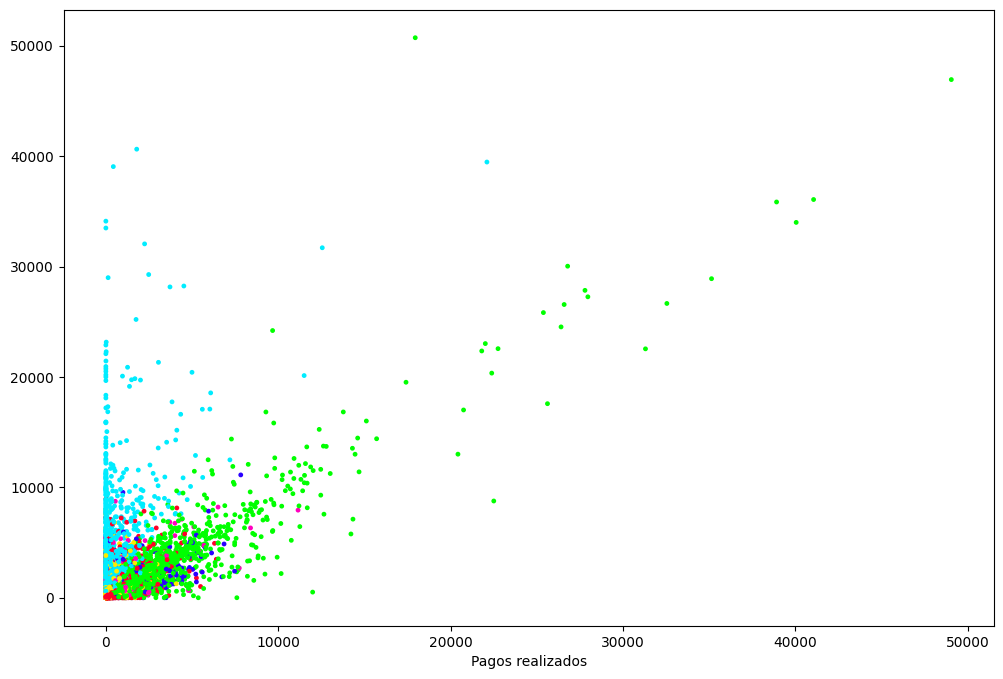

In [19]:
kmeans= KMeans(n_clusters=6,n_init=10,max_iter=300 )
y_pred=kmeans.fit_predict(valores_normalizados_tarjetas_arr)
labels=kmeans.labels_

credit_card_df['CLUSTERS']= labels
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(credit_card_df['PURCHASES'], credit_card_df['PAYMENTS'], c=labels, s=6, cmap='gist_rainbow')
plt.xlabel('Compras Realizadas')
plt.xlabel('Pagos realizados')
plt.show

 El grafico anterior permite inferir algunos comportamientos de los clientes de tarjetas respecto a las variables pagos y compras pero son solo dos variables de un total de dieciocho lo que significa que todavía hay muchas variables que comparar, el sigueinte método podría darnos una idea de las gráficas del comportamiento de pares de varraibles del conjunto de las dieciocho.

In [20]:
# Este código se deja incluido en esta celda solo para comparar graficos pero no son muy útiles para el análisis, mas adelante se usan otras técnicas mas prácticas
# import seaborn as sns
# sns.pairplot(credit_card_df[0:],hue='CLUSTERS', palette='viridis')

la biblioteca seaborn que contiene una función que nos permitió visualizar lado a lado varias gráficas con las diferentes combinaciones de relaciones entre los atributos simultáneamente y, así, posibilitar un análisis más diverso de nuestros clusters. La función es pairplot(). Para este paso, únicamente utilizamos 3 parámetros: nuestro dataframe credit_card_df, hue = ‘CLUSTER’ y palette = ‘viridis’.

**Procedimientos aprendidos hasta aquí:**
- Comparar diferentes configuraciones del k-means por medio de la validación relativa utilizando la biblioteca;
- Validar la estructura de los clusters ;
- Verificar la estabilidad de los clusters;
- Utilizar recursos de las bibliotecas pandas y numpy como herramientas en el desarrollo de los procedimientos de verificación y validación de los clusters;
- Generar gráficos para la visualización de los clusters utilizando las bibliotecas matplotlib.pyplot y seaborn;
- Interpretar los clusters por medio de los gráficos;
- Entender la dificultad de la actividad de visualización de clusters.

###  **8. Entendiendo los valores de los atributos en los clusters**

Como ya tenemos nuestros clusters, podemos agrupar nuestros atributos por cada cluster para poder observar algunas medidas estadísticas importantes para la mejor comprensión de nuestros datos.



In [21]:
credit_card_df.groupby('CLUSTERS').describe()

BALANCE                                                     \
           count         mean          std         min          25%   
CLUSTERS                                                              
0         3204.0   418.032017   797.242153    0.000000    22.858221   
1         1143.0  2429.889170  2032.506183    1.691842   945.019242   
2         1486.0  1118.416733  1649.518087    0.000000   208.787132   
3          979.0  1767.343917  2002.934061    0.000000   498.274313   
4         1796.0  3242.269276  2630.347375  114.523682  1355.372679   
5          342.0  1959.062058  1816.549846   70.794108  1010.501276   

                                                 BALANCE_FREQUENCY            \
                  50%          75%           max             count      mean   
CLUSTERS                                                                       
0           79.389139   380.828477   7533.854422            3204.0  0.774292   
1         1845.210833  3327.567339  11581.933500            1143.0  0.892026   
2          539.366142  1359.237898  19043.138560            1486.0  0.929514   
3         1064.473728  2268.675458  14581.459140             979.0  0.856842   
4         2268.945669  4490.172352  18495.558550            1796.0  0.998536   
5         1301.788287  2150.506925  11209.370760             342.0  0.987365   

          ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
          ...              75%           max            count      mean   
CLUSTERS  ...                                                             
0         ...       238.873303   3933.230932           3204.0  0.252561   
1         ...      1026.936888   8644.138069           1143.0  0.008869   
2         ...       497.247095  18621.013310           1486.0  0.284290   
3         ...       891.640865  21235.065300            979.0  0.128703   
4         ...      1464.078744   9642.502512           1796.0  0.000097   
5         ...      8172.035927  76406.207520            342.0  0.022729   

                                                            
               std  min  25%       50%       75%       max  
CLUSTERS                                                    
0         0.348802  0.0  0.0  0.000000  0.454545  1.000000  
1         0.044389  0.0  0.0  0.000000  0.000000  0.600000  
2         0.369454  0.0  0.0  0.083333  0.571429  1.000000  
3         0.197516  0.0  0.0  0.083333  0.166667  1.000000  
4         0.002909  0.0  0.0  0.000000  0.000000  0.090909  
5         0.099126  0.0  0.0  0.000000  0.000000  1.000000  

[6 rows x 128 columns]

Sucede que ahora tenemos una tabla de 6 filas por 128 columnas… Es bastante complicado analizar cada uno de los diez atributos, y más aún, cuando no sabemos la importancia del atributo para la caracterización de nuestro cluster. Aquí entra en juego un concepto estadístico crítico que es la Varianza. Recordemos que la varianza es una medida de dispersión que representa la variabilidad de un conjunto de datos. Mientras haya más dispersión, más información vamos a encontrar en nuestros datos.

Pero, ¿Cuál punto de todo nuestro conjunto de datos representa mejor a cada uno de los clusters? Entonces, si calculamos el promedio de todos los puntos de un atributo obtendremos el punto que mejor representa a mis datos. Estamos hablando del centroide de cada cluster.

Consecuentemente, a cada centroide le debemos calcular su dispersión para hallar donde está concentrada la información que dio lugar a nuestros clusters.

In [22]:
# Consultemos los centroides de cada cluster
kmeans.cluster_centers_

array([[6.52063823e-02, 2.31481221e-04, 1.22168481e-01, 4.79139373e-02,
        7.43571504e-02, 1.96870509e-02, 1.74943471e-04, 3.38245061e-05,
        1.42038868e-04, 7.31381498e-06, 1.14800474e-04, 2.89228997e-03,
        9.45434693e-01, 1.54765983e-01, 5.57922420e-02, 7.79532951e-05],
       [3.71230777e-01, 2.30637496e-04, 4.13552925e-02, 2.40132591e-02,
        1.73467336e-02, 5.01340843e-01, 4.76712104e-05, 1.62362612e-05,
        3.14865146e-05, 8.05809133e-05, 1.81925537e-03, 8.03149699e-04,
        7.07727462e-01, 1.51103804e-01, 1.31465001e-01, 2.40783987e-06],
       [1.54428975e-01, 2.44344464e-04, 4.43834726e-01, 2.60664385e-01,
        1.83347968e-01, 2.62724092e-02, 2.04773372e-04, 8.98570577e-05,
        1.50682023e-04, 9.46815959e-06, 1.73876943e-04, 6.18814123e-03,
        6.03024926e-01, 4.00711758e-01, 8.38707344e-02, 7.31821775e-05],
       [2.28957049e-01, 2.10388494e-04, 6.85029322e-02, 3.88242039e-02,
        2.96844441e-02, 3.66150271e-01, 5.81544203e-05, 2.270

notamos seis grupos de valores, cada grupo representa un centroide y a su vez contiene dieciseis valores que corresponden a las dieciseis variables,  la idea es ver por ejemplo si el valor correspo diente a una variable varia mucho entre diferentes centroides, si es así la variable es buena candidata

In [24]:
credit_card_df.drop(columns='CLUSTERS', inplace=True)
centroids=pd.DataFrame(kmeans.cluster_centers_, columns=credit_card_df.columns)
round(centroids.var(),3).sort_values(ascending=False)

MINIMUM_PAYMENTS                    0.065
CREDIT_LIMIT                        0.042
CASH_ADVANCE                        0.041
PAYMENTS                            0.036
BALANCE                             0.030
PURCHASES                           0.022
ONEOFF_PURCHASES                    0.008
INSTALLMENTS_PURCHASES              0.004
BALANCE_FREQUENCY                   0.000
PURCHASES_FREQUENCY                 0.000
ONEOFF_PURCHASES_FREQUENCY          0.000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000
CASH_ADVANCE_FREQUENCY              0.000
CASH_ADVANCE_TRX                    0.000
PURCHASES_TRX                       0.000
PRC_FULL_PAYMENT                    0.000
dtype: float64

Esta ejecución nos devuelve un pandas Series con los valores de varianza en orden descendente. ¡Ahora, podremos seleccionar los atributos ('MINIMUM_PAYMENTS', 'CREDIT_LIMIT','CASH_ADVANCE', 'PAYMENTS', 'BALANCE', 'PURCHASES') que mejor definen a cada uno de nuestros seis clusters.

In [27]:
#Como en el paso anterior e eliminó la variable CLUSTER para poder procesar el array ahora debemos crear la variable nuevamente pero solo una vez
credit_card_df['CLUSTERS']=labels
description= round(credit_card_df.groupby('CLUSTERS')['MINIMUM_PAYMENTS','CREDIT_LIMIT','CASH_ADVANCE','PAYMENTS','BALANCE','PURCHASES'].mean(),2)
description

,MINIMUM_PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,PAYMENTS,BALANCE,PURCHASES
CLUSTERS,,,,,,
0,220.66,5131.91,119.37,817.04,418.03,628.68
1,796.72,4475.07,3106.66,975.00,2429.89,238.96
2,537.75,4111.62,185.88,3052.73,1118.42,3330.06
3,747.42,3952.32,3091.81,5000.35,1767.34,528.33
4,1150.06,4418.18,762.76,1052.05,3242.27,519.33
5,6865.32,2198.68,451.82,1339.89,1959.06,856.28


**Observación:** Aunque las pruebas del paso anterior se hicieron con el metodo describe() para poder comparar todas las medidas de tendencia central realmente la que nos intereza comparar entre clusters son las medias asi que al final usamos el método mean()

Hay un aspecto muy importante que debemos considerar, y es la cantidad de clientes que hay en cada cluster, pues este dato es crítico para nuestra interpretación. En este sentido, debemos agregar una nueva columna a nuestro dataframe description. La llamaremos ’N_CUSTOMERS’ y le asignaremos la cantidad de clientes que hay en cada cluster utilizando la función value_counts().

In [28]:
description['N_CUSTOMERS']=credit_card_df.CLUSTER.value_counts()
description

,MINIMUM_PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,PAYMENTS,BALANCE,PURCHASES,N_CUSTOMERS
CLUSTERS,,,,,,,
0,220.66,5131.91,119.37,817.04,418.03,628.68,3204
1,796.72,4475.07,3106.66,975.00,2429.89,238.96,1143
2,537.75,4111.62,185.88,3052.73,1118.42,3330.06,1486
3,747.42,3952.32,3091.81,5000.35,1767.34,528.33,979
4,1150.06,4418.18,762.76,1052.05,3242.27,519.33,1796
5,6865.32,2198.68,451.82,1339.89,1959.06,856.28,342


**Lo importante en esta sección:**
- Obtener y a analizar estadísticas sobre los valores de los atributos;
- Calcular la varianza de los centroides de los clusters;
- Seleccionar los mejores atributos para servir como base para la interpretación de los clusters.

### **9. Interpretando los clusters**

Queremos seleccionar cuales son las variables mas representativas del comportamiento de los clientes en cada uno de los clusters para seguir nuestro analisis

**Variables con alta varianza en sus promedios dentro de los clusters:**
- BALANCE : Balance amount left in their account to make purchases
- PURCHASES : Amount of purchases made from account
- CASH_ADVANCE : Cash in advance given by the user
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user


In [29]:
description

,MINIMUM_PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE,PAYMENTS,BALANCE,PURCHASES,N_CUSTOMERS
CLUSTERS,,,,,,,
0,220.66,5131.91,119.37,817.04,418.03,628.68,3204
1,796.72,4475.07,3106.66,975.00,2429.89,238.96,1143
2,537.75,4111.62,185.88,3052.73,1118.42,3330.06,1486
3,747.42,3952.32,3091.81,5000.35,1767.34,528.33,979
4,1150.06,4418.18,762.76,1052.05,3242.27,519.33,1796
5,6865.32,2198.68,451.82,1339.89,1959.06,856.28,342


- Cluster 0:
  - Más gastos de compras.
  - (*) Mejor pagan.
  - Tienen un límite de crédito medio.
- **Cluster 1: Mejor grupo (Aplicar estrategia para aumentar ganancias)**
  - Menos saldo disponible para compras.
  - Solicita menos avances en efectivo.
  - Limite de crédito más alto.
  - (*) Pagan bien.
  - Grupo más numeroso de clientes.
- **Cluster 2: Peor grupo (Depurar a este grupo para reducir perdidas)**
  - Tiene más saldo disponible para compras.
  - (*) Peores para pagar.
  - Segundo limite de crédito más alto.
- Cluster 3:
  - Más solicita avances en efectivo.
  - (*) Pagan moderadamente.
- Cluster 4:
  - Tiene límite de crédito más bajo.
  - (*) No pagan muy bien.
  - Grupo más pequeño de clientes.
- Cluster 5:
  - Menos realiza gastos con compras.
  - Solicita más avances en efectivo

(*) La variable PURCHASE es importante pero sus valores no son concluyentes por lo que vamos a valernos de otra variable (PRCFULLPAYMENT) para poder sacar conclusiones (insights) significativas.

In [30]:
credit_card_df.groupby('CLUSTERS')['PRC_FULL_PAYMENT'].mean()

CLUSTERS
0    0.252561
1    0.008869
2    0.284290
3    0.128703
4    0.000097
5    0.022729
Name: PRC_FULL_PAYMENT, dtype: float64

**Lo importante en esta sección:**
- Analizar los datos de los clusters;
- Interpretar los datos de los clusters;
- Extraer los patrones que caracterizan cada cluster.

### **10. Utilizando los clusters**

Una de las principales aplicaciones después de utilizar técnicas clusterización sería, por ejemplo, el idear una estrategia de negocios para aumentar ingresos o disminuir pérdidas en el negocio.

Para realizar el Test A/B se divide el cluster en  dos subgrupos y se aplica la estrategia a uno de los subgrupos (subgrupo de prueba), mientras que el otro subgrupo (sugrupo de control) permanece sin ninguna estrategia. Esto permitirá evaluar la efectividad de la estrategia en determinado grupo de clientes (cluster) , al tener como referencia clientes con patrones de comportamiento semejantes.